# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
#df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df = pd.read_csv("anscombe.csv", sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# Respuestas

1) ¿ los grupos son muy distintos entre si?
- El Grupo 1 y 3 tienen una relación lineal positiva entre "x" e "y", pero se observa una mayor dispersión en El grupo 1.
- El grupo 4 muestra que "x" tiene un comportamiento constante con respecto a "y".
- El grupo 2 muestra un comportamiento cuadratico positivo hasta "x" = 11, a partir de ese punto la pendiente impacta negativamente en "y". 

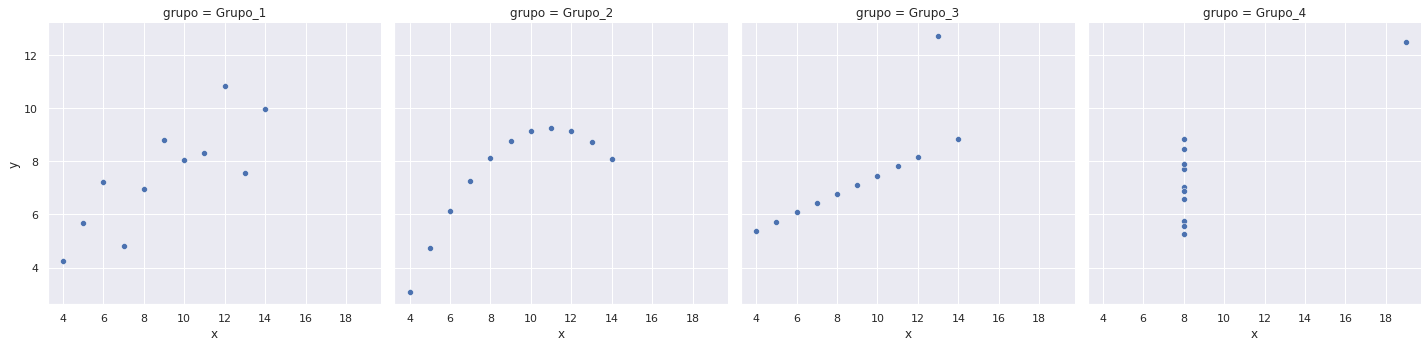

In [3]:
sns.relplot(
    data=df, x="x", y="y",
    col="grupo",
    kind="scatter"
)

2) Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

- El comportamiento de los 4 grupos es muy similar.
  El atributo "x" tiene virtualmente los mismos estadisticos, excepto en el grupo 4 en donde se comporta de manera constante en el valor 8.
  El atributo "y" tiene tambien los mismos estadisticos.  

In [4]:
df.groupby('grupo').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

[Text(0.5, 1.0, 'Grupo 4')]

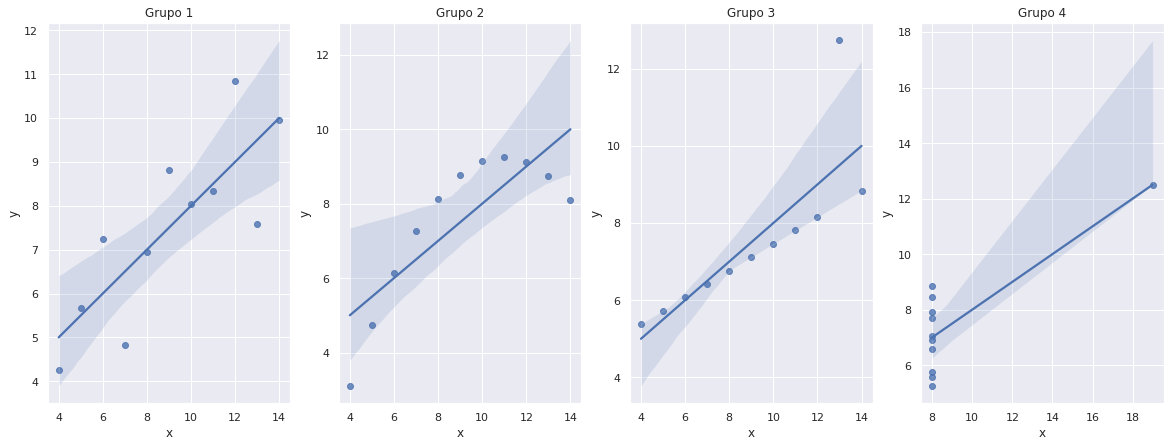

In [5]:
sns.set(rc={'figure.figsize':(20,7)})
fig, axs = plt.subplots(ncols=4)
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_1"], ax=axs[0]).set(title='Grupo 1')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_2"], ax=axs[1]).set(title='Grupo 2')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_3"], ax=axs[2]).set(title='Grupo 3')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_4"], ax=axs[3]).set(title='Grupo 4')


Se aplica la función log(x) a cada atributo del modelo de regreción.

[Text(0.5, 1.0, 'Grupo 4')]

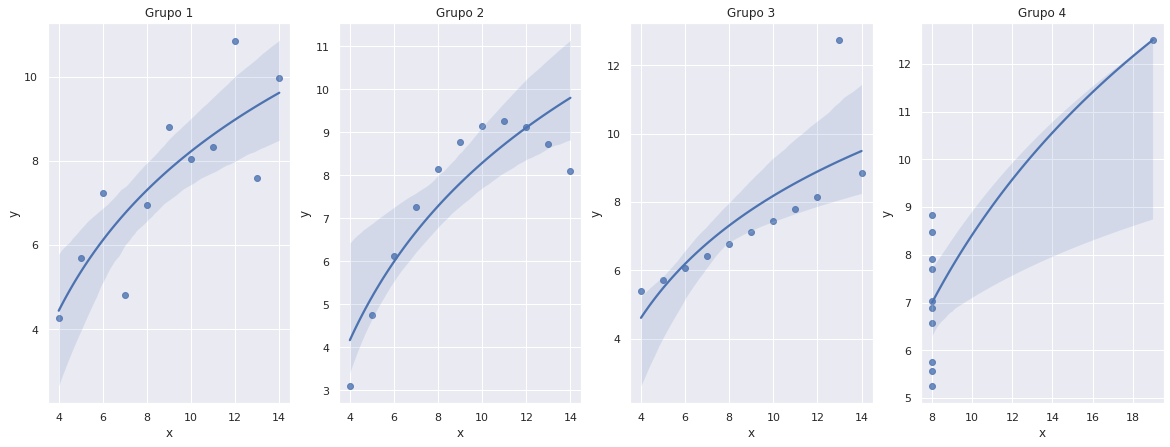

In [6]:
sns.set(rc={'figure.figsize':(20,7)})
fig, axs = plt.subplots(ncols=4)
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_1"], logx=True, ax=axs[0]).set(title='Grupo 1')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_2"], logx=True, ax=axs[1]).set(title='Grupo 2')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_3"], logx=True, ax=axs[2]).set(title='Grupo 3')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_4"], logx=True, ax=axs[3]).set(title='Grupo 4')

4. Calcule los resultados de las métricas para cada grupo. Interprete.

<AxesSubplot:>

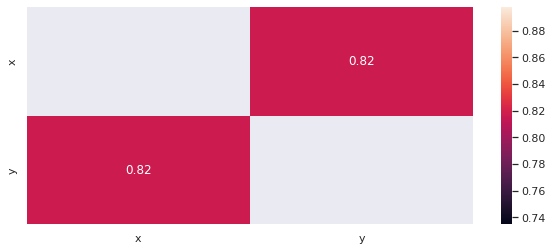

In [7]:
L = df[["x","y"]].corr()
plt.rcParams["figure.figsize"] = (10,4)
sns.heatmap(L[(abs(L)>0.4) & (L!=1)],annot=True)

Existe una relación lineal positiva entre ambos atributos.

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Se explorarán las aternativas de eliminar outlayers, normalizar los valores de los atributos o eliminar elementos de la fuente de datos y aplicar funcion log(x) sobre los atributos.

5.1 Los grupos 2,3 y 4 muestran outlayers para el atributo "y"

Text(0.5, 1.0, 'Atributo Y')

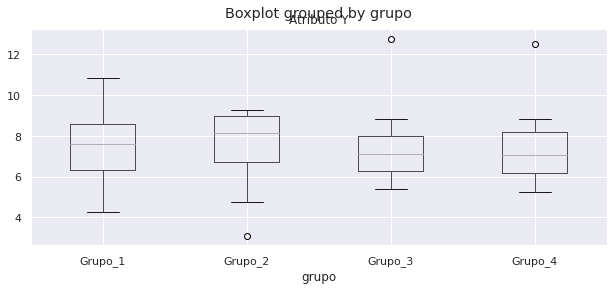

In [8]:
df.boxplot(column = 'y', by = 'grupo');
plt.title('Atributo Y')

Solo el grupo 4 muestra outlayers para el atributo "x"

Text(0.5, 1.0, 'Atributo X')

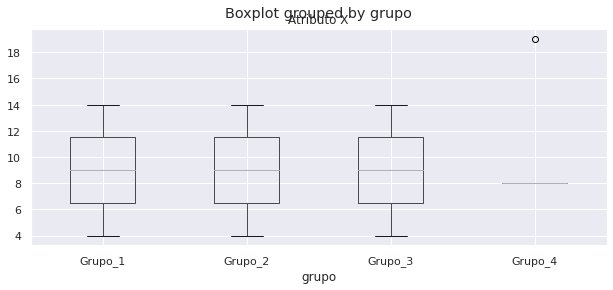

In [9]:
df.boxplot(column = 'x', by = 'grupo');
plt.title('Atributo X')

Se decide no eliminar los OutLayer por la baja cantidad de la muestra.

5.2 Se normaliza por el Z_Score, dado que este utiliza los estadisticos y los valores procesados siguen una distribución normal estándar con media 0 y varianza 1.

In [10]:
from sklearn import preprocessing

df_num = df[["x", "y"]]
df_cat = df["grupo"]

zscore_scale = preprocessing.StandardScaler()
df_z1 = zscore_scale.fit_transform(df_num)
df_z1 = pd.DataFrame(df_z1,columns=['x','y'])
df_z1 = df_z1.rename(columns={'x': 'x_zs', 'y': 'y_zs'})

df_2 = pd.concat([df_num,df_z1, df_cat], axis=1)
       

df_2.head(50)


,x,y,x_zs,y_zs,grupo
0,10,8.04,0.316228,0.278496,Grupo_1
1,8,6.95,-0.316228,-0.284364,Grupo_1
2,13,7.58,1.264911,0.040959,Grupo_1
3,9,8.81,0.000000,0.676113,Grupo_1
4,11,8.33,0.632456,0.428248,Grupo_1
5,14,9.96,1.581139,1.269957,Grupo_1
6,6,7.24,-0.948683,-0.134612,Grupo_1
7,4,4.26,-1.581139,-1.673442,Grupo_1
8,12,10.84,0.948683,1.724376,Grupo_1
9,7,4.82,-0.632456,-1.384266,Grupo_1


No se observan cambios al aplicar Normalización a los atributos, excepto sobre el Grupo 4.

[Text(0.5, 1.0, 'Grupo 4 ZScore')]

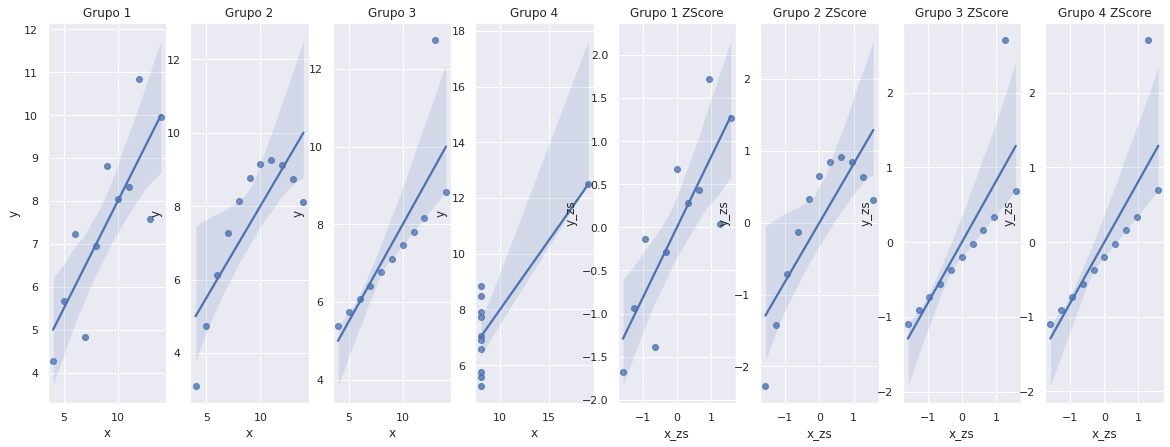

In [11]:
sns.set(rc={'figure.figsize':(20,7)})
fig, axs = plt.subplots(ncols=8)
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_1"], ax=axs[0]).set(title='Grupo 1')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_2"], ax=axs[1]).set(title='Grupo 2')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_3"], ax=axs[2]).set(title='Grupo 3')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_4"], ax=axs[3]).set(title='Grupo 4')

sns.regplot(x="x_zs", y="y_zs", data=df_2[df_2["grupo"]=="Grupo_1"], ax=axs[4]).set(title='Grupo 1 ZScore')
sns.regplot(x="x_zs", y="y_zs", data=df_2[df_2["grupo"]=="Grupo_2"], ax=axs[5]).set(title='Grupo 2 ZScore')
sns.regplot(x="x_zs", y="y_zs", data=df_2[df_2["grupo"]=="Grupo_3"], ax=axs[6]).set(title='Grupo 3 ZScore')
sns.regplot(x="x_zs", y="y_zs", data=df_2[df_2["grupo"]=="Grupo_3"], ax=axs[7]).set(title='Grupo 4 ZScore')


5.3 Se eliminara el grupo 4 dado que la variable x se comporta de manera constante y no aporta valor al analisis.

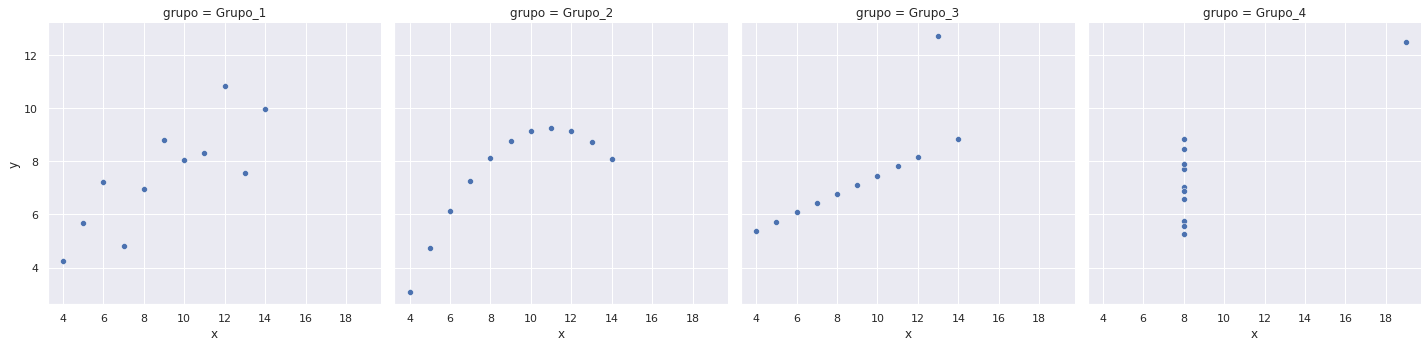

In [12]:
sns.relplot(
    data=df, x="x", y="y",
    col="grupo",
    kind="scatter"
)

In [13]:
df_exc = df[df["grupo"] != "Grupo_4"]

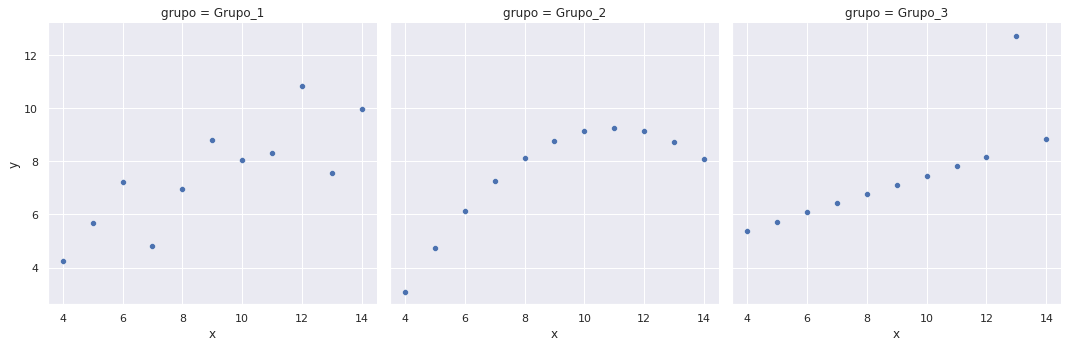

In [14]:
sns.relplot(
    data=df_exc, x="x", y="y",
    col="grupo",
    kind="scatter"
)

La estrategia a segir será eliminar el grupo que tiene un comportamiento constante y aplicar al modelo log(x), no se considerara la normalización de los valores mediante el Z_Score, dado que no genera cambios significativos en la regresión.

In [15]:
df_final = df[df["grupo"] != "Grupo_4"]

[Text(0.5, 1.0, 'Grupo 3 Ajustes Varios')]

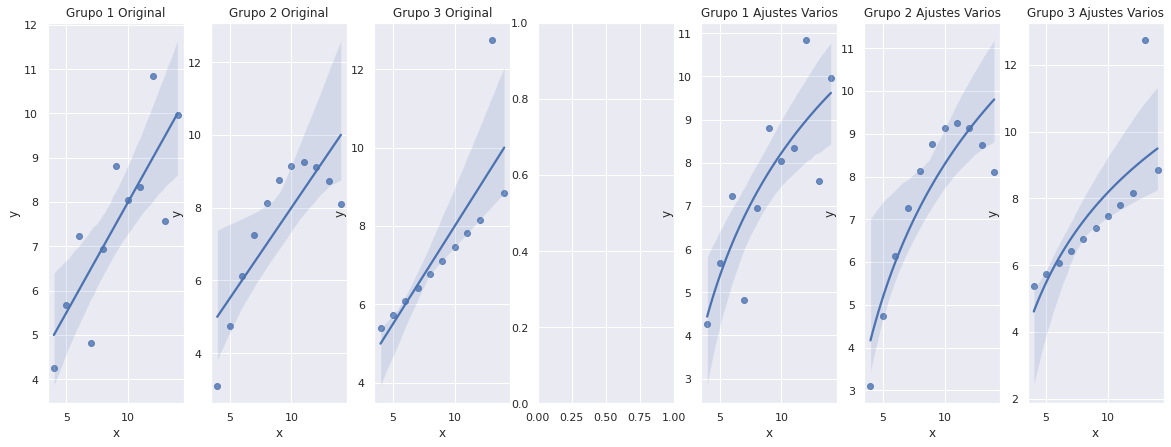

In [16]:
sns.set(rc={'figure.figsize':(20,7)})
fig, axs = plt.subplots(ncols=7)
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_1"], ax=axs[0]).set(title='Grupo 1 Original')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_2"], ax=axs[1]).set(title='Grupo 2 Original')
sns.regplot(x="x", y="y", data=df[df["grupo"]=="Grupo_3"], ax=axs[2]).set(title='Grupo 3 Original')

sns.regplot(x="x", y="y", data=df_final[df_final["grupo"]=="Grupo_1"], logx=True, ax=axs[4]).set(title='Grupo 1 Ajustes Varios')
sns.regplot(x="x", y="y", data=df_final[df_final["grupo"]=="Grupo_2"], logx=True, ax=axs[5]).set(title='Grupo 2 Ajustes Varios')
sns.regplot(x="x", y="y", data=df_final[df_final["grupo"]=="Grupo_3"], logx=True, ax=axs[6]).set(title='Grupo 3 Ajustes Varios')

Se muestra un mejor ajuste de las regresiones lineales de los grupos 1, 2 y 3